In [1]:
pth = '/Users/AJ/Desktop/data'
#os.chdir(pth)

In [2]:
import os
import pandas as pd
import numpy as np
import pylab
import string
import sys
import statsmodels.api as sm
from pandas import ExcelWriter
import matplotlib.pyplot as plt
from matplotlib import pylab
from pylab import rcParams

plt.rcParams['font.family'] = 'sans-serif'
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
import matplotlib as mpl
mpl.style.use('ggplot')

# R
#%load_ext rpy2.ipython
#%R library(ez)
#%R library(lme4)
#%R library(lmerTest)
#%R library(lsmeans)
#%R library(mutoss)
#%R library(MASS)
#%R lsm.options(disable.pbkrtest=TRUE) 

%matplotlib inline

from IPython.display import clear_output

clear_output()

In [3]:
from numpy import array,log, zeros, sum, mean
from scipy import stats 
#from mfit import *
#from mfit_GNG_models import *
from copy import deepcopy
#from WSLS import *
#from Plt_TrxTr_Acc import Plot_TrxTr_Acc

In [4]:
# group_dict = {2:1,3:1,4:2,5:2,6:2,7:1,8:2,9:2,10:1,11:1,12:1,13:1,15:2,16:2,17:2,18:1,19:2, 20:1,21:2, 22:2, 
#               23:2, 24:1,25:2, 26:1, 27:2,28:2,29:2,30:1,31:1,32:1,33:2,34:1,35:2, 36:2, 37:1}
group_dict = {13:1,15:2,16:2,17:2,18:1,19:2, 20:1,21:2, 22:2, 
              23:2, 24:1,25:2, 26:1, 27:2,28:2,29:2,30:1,31:1,32:1,33:2,34:1,35:2,36:2, 37:1, 38:2, 39:2}

In [5]:
print(group_dict)

{13: 1, 15: 2, 16: 2, 17: 2, 18: 1, 19: 2, 20: 1, 21: 2, 22: 2, 23: 2, 24: 1, 25: 2, 26: 1, 27: 2, 28: 2, 29: 2, 30: 1, 31: 1, 32: 1, 33: 2, 34: 1, 35: 2, 36: 2, 37: 1, 38: 2, 39: 2}


In [6]:
# Start loop to go through subjects 
subs = range(13,40)
d=pd.DataFrame([])
alldirfiles = os.listdir(pth)
os.chdir(pth)

In [7]:
subs = (13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35, 36, 37, 38,39)
print(subs)
# subs = subs + range(15,27)
# print(subs)

(13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39)


In [8]:
for n,sub in enumerate(subs):
    #Grab data and make some adjustments
    subnum = '00%s_' %(sub) if len(str(sub)) == 1 else '0%s_' %(sub)
    subfiles = [x for x in alldirfiles if subnum in x[0:len(str(sub))+3]]
    subfile = [x for x in subfiles if 'xlsx' in x]
    #pddata = pd.read_csv(subfile[0][:], index_col = None)
    dtmp = pd.read_excel(subfile[0][:],sheetname='trials',index_col = None,header=0)
    dtmp['TargetRespRT'] = dtmp.ix[:,'TargetResp.rt_raw']
    dtmp['Group'] = group_dict[sub]
    dtmp = dtmp.rename(columns=lambda x: x.replace('.', '_'))
    dtmp['block'] = 1
    dtmp.loc[194:,'block'] = 2
    #dtmp = dtmp.ix[0:240]
    dtmp['subject'] = sub
    d=pd.concat([d,dtmp],axis=0)
    d['condtrialnum'] = d.block_trialnum_mean.apply(lambda x: x-48 if x>48 else x)

In [9]:
d=d[d.Condition!='break']
d=d[pd.notnull(d.Condition)]
d.reset_index(drop=True,inplace=True)

In [10]:
grp = d.groupby(['Group','Condition','ConditionCue_Corr_Resp','SuicideCond'])

In [11]:
#Make a dict to easily grab divided data
ns = []
for n,g in grp:
    ns.append(n)
ns_dict = dict(zip(range(len(ns)),ns))

In [13]:
ns

[(1, u'NegRef', u'NoResp', u'NonSuicide'),
 (1, u'NegRef', u'NoResp', u'Suicide'),
 (1, u'NegRef', u'Resp', u'NonSuicide'),
 (1, u'NegRef', u'Resp', u'Suicide'),
 (1, u'PosRef', u'NoResp', u'NonSuicide'),
 (1, u'PosRef', u'NoResp', u'Suicide'),
 (1, u'PosRef', u'Resp', u'NonSuicide'),
 (1, u'PosRef', u'Resp', u'Suicide'),
 (2, u'NegRef', u'NoResp', u'NonSuicide'),
 (2, u'NegRef', u'NoResp', u'Suicide'),
 (2, u'NegRef', u'Resp', u'NonSuicide'),
 (2, u'NegRef', u'Resp', u'Suicide'),
 (2, u'PosRef', u'NoResp', u'NonSuicide'),
 (2, u'PosRef', u'NoResp', u'Suicide'),
 (2, u'PosRef', u'Resp', u'NonSuicide'),
 (2, u'PosRef', u'Resp', u'Suicide')]

In [17]:
grp.get_group(ns_dict[0]).groupby(['condtrialnum']).Correct_Choice_raw.count().head(1)

condtrialnum
1    10
Name: Correct_Choice_raw, dtype: int64

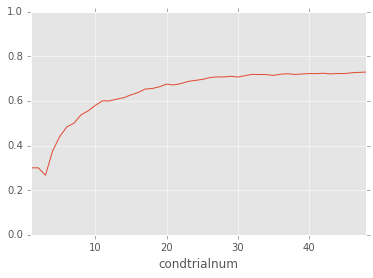

In [18]:
pd.expanding_mean(grp.get_group(ns_dict[0]).groupby(['condtrialnum']).Correct_Choice_raw.mean()).plot()
plt.ylim([0,1])
plt.show()

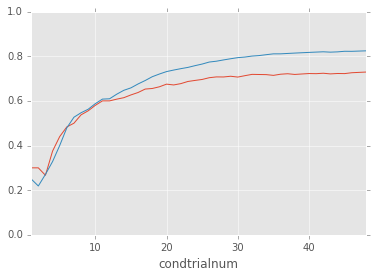

In [19]:
pd.expanding_mean(grp.get_group(ns_dict[0]).groupby(['condtrialnum']).Correct_Choice_raw.mean()).plot()
pd.expanding_mean(grp.get_group(ns_dict[8]).groupby(['condtrialnum']).Correct_Choice_raw.mean()).plot()
plt.ylim([0,1])
plt.show()

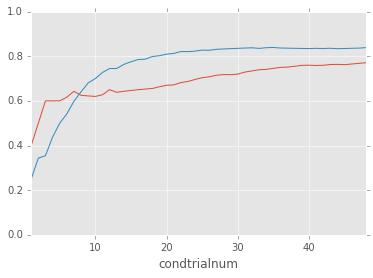

In [20]:
pd.expanding_mean(grp.get_group(ns_dict[1]).groupby(['condtrialnum']).Correct_Choice_raw.mean()).plot()
pd.expanding_mean(grp.get_group(ns_dict[9]).groupby(['condtrialnum']).Correct_Choice_raw.mean()).plot()
plt.ylim([0,1])
plt.show()

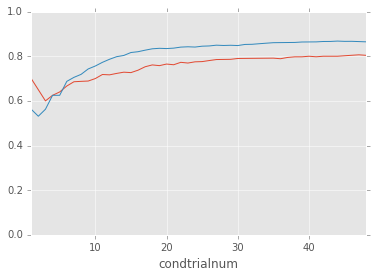

In [21]:
pd.expanding_mean(grp.get_group(ns_dict[3]).groupby(['condtrialnum']).Correct_Choice_raw.mean()).plot()
pd.expanding_mean(grp.get_group(ns_dict[11]).groupby(['condtrialnum']).Correct_Choice_raw.mean()).plot()
plt.ylim([0,1])
plt.show()

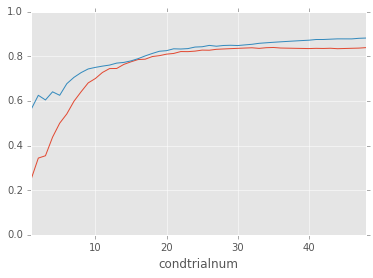

In [22]:
pd.expanding_mean(grp.get_group(ns_dict[9]).groupby(['condtrialnum']).Correct_Choice_raw.mean()).plot()
pd.expanding_mean(grp.get_group(ns_dict[13]).groupby(['condtrialnum']).Correct_Choice_raw.mean()).plot()
plt.ylim([0,1])
plt.show()

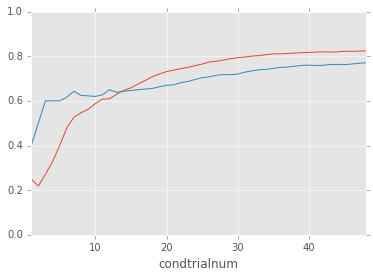

In [23]:
pd.expanding_mean(grp.get_group(ns_dict[8]).groupby(['condtrialnum']).Correct_Choice_raw.mean()).plot()
pd.expanding_mean(grp.get_group(ns_dict[1]).groupby(['condtrialnum']).Correct_Choice_raw.mean()).plot()
plt.ylim([0,1])
plt.show()

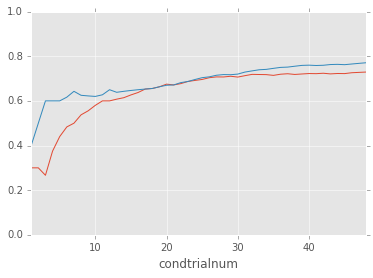

In [24]:
pd.expanding_mean(grp.get_group(ns_dict[0]).groupby(['condtrialnum']).Correct_Choice_raw.mean()).plot()
pd.expanding_mean(grp.get_group(ns_dict[1]).groupby(['condtrialnum']).Correct_Choice_raw.mean()).plot()
plt.ylim([0,1])
plt.show()

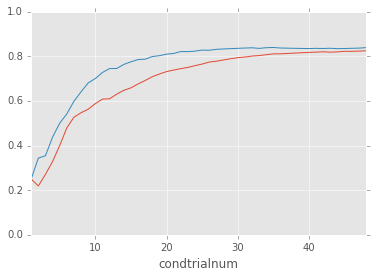

In [25]:
pd.expanding_mean(grp.get_group(ns_dict[8]).groupby(['condtrialnum']).Correct_Choice_raw.mean()).plot()
pd.expanding_mean(grp.get_group(ns_dict[9]).groupby(['condtrialnum']).Correct_Choice_raw.mean()).plot()
plt.ylim([0,1])
plt.show()

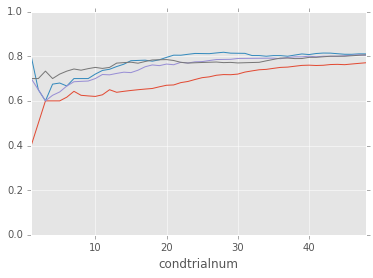

In [26]:
pd.expanding_mean(grp.get_group(ns_dict[1]).groupby(['condtrialnum']).Correct_Choice_raw.mean()).plot()
pd.expanding_mean(grp.get_group(ns_dict[2]).groupby(['condtrialnum']).Correct_Choice_raw.mean()).plot()
pd.expanding_mean(grp.get_group(ns_dict[3]).groupby(['condtrialnum']).Correct_Choice_raw.mean()).plot()
pd.expanding_mean(grp.get_group(ns_dict[4]).groupby(['condtrialnum']).Correct_Choice_raw.mean()).plot()
plt.ylim([0,1])
plt.show()

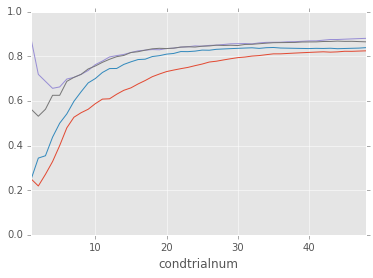

In [27]:
pd.expanding_mean(grp.get_group(ns_dict[8]).groupby(['condtrialnum']).Correct_Choice_raw.mean()).plot()
pd.expanding_mean(grp.get_group(ns_dict[9]).groupby(['condtrialnum']).Correct_Choice_raw.mean()).plot()
pd.expanding_mean(grp.get_group(ns_dict[10]).groupby(['condtrialnum']).Correct_Choice_raw.mean()).plot()
pd.expanding_mean(grp.get_group(ns_dict[11]).groupby(['condtrialnum']).Correct_Choice_raw.mean()).plot()
plt.ylim([0,1])
plt.show()

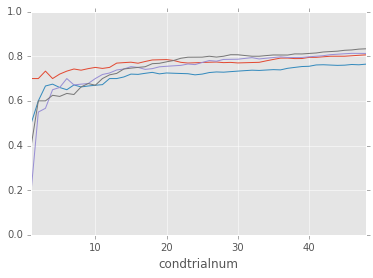

In [28]:
pd.expanding_mean(grp.get_group(ns_dict[4]).groupby(['condtrialnum']).Correct_Choice_raw.mean()).plot()
pd.expanding_mean(grp.get_group(ns_dict[5]).groupby(['condtrialnum']).Correct_Choice_raw.mean()).plot()
pd.expanding_mean(grp.get_group(ns_dict[6]).groupby(['condtrialnum']).Correct_Choice_raw.mean()).plot()
pd.expanding_mean(grp.get_group(ns_dict[7]).groupby(['condtrialnum']).Correct_Choice_raw.mean()).plot()
plt.ylim([0,1])
plt.show()

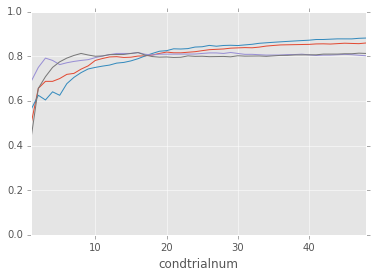

In [29]:
pd.expanding_mean(grp.get_group(ns_dict[12]).groupby(['condtrialnum']).Correct_Choice_raw.mean()).plot()
pd.expanding_mean(grp.get_group(ns_dict[13]).groupby(['condtrialnum']).Correct_Choice_raw.mean()).plot()
pd.expanding_mean(grp.get_group(ns_dict[14]).groupby(['condtrialnum']).Correct_Choice_raw.mean()).plot()
pd.expanding_mean(grp.get_group(ns_dict[15]).groupby(['condtrialnum']).Correct_Choice_raw.mean()).plot()
plt.ylim([0,1])
plt.show()

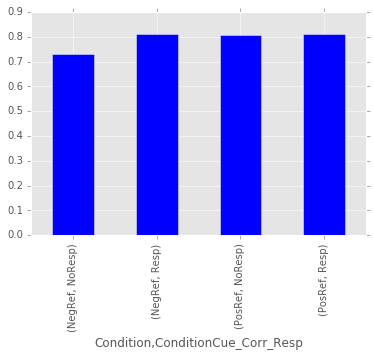

In [30]:
d[(d.SuicideCond=='NonSuicide')&(d.Group==1)].groupby(['Condition','ConditionCue_Corr_Resp']).Correct_Choice_raw.mean().plot(kind='bar')

(0.017909625422889677, 0.018132120019070833)

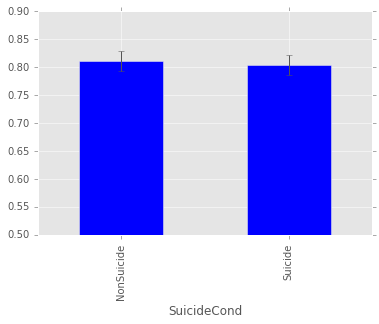

In [31]:
sem1 = d[(d.ConditionCue_Corr_Resp=='Resp')&(d.Condition=='NegRef')&(d.Group==1)].groupby(['SuicideCond']).Correct_Choice_raw.sem()['NonSuicide']
sem2 = d[(d.ConditionCue_Corr_Resp=='Resp')&(d.Condition=='NegRef')&(d.Group==1)].groupby(['SuicideCond']).Correct_Choice_raw.sem()['Suicide']
d[(d.ConditionCue_Corr_Resp=='Resp')&(d.Condition=='NegRef')&(d.Group==1)].groupby(['SuicideCond']).Correct_Choice_raw.mean().plot(kind='bar',  yerr=[sem1,sem2])
plt.ylim([.5,.9])   
sem1, sem2

(0.020304705939149719, 0.019203845819795343)

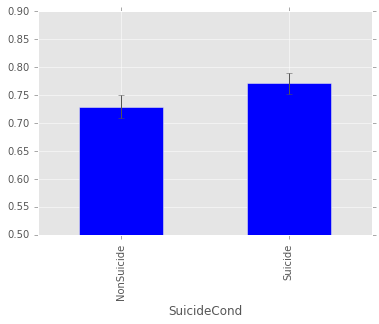

In [32]:
sem1 = d[(d.ConditionCue_Corr_Resp=='NoResp')&(d.Condition=='NegRef')&(d.Group==1)].groupby(['SuicideCond']).Correct_Choice_raw.sem()['NonSuicide']
sem2 = d[(d.ConditionCue_Corr_Resp=='NoResp')&(d.Condition=='NegRef')&(d.Group==1)].groupby(['SuicideCond']).Correct_Choice_raw.sem()['Suicide']
d[(d.ConditionCue_Corr_Resp=='NoResp')&(d.Condition=='NegRef')&(d.Group==1)].groupby(['SuicideCond']).Correct_Choice_raw.mean().plot(kind='bar',  yerr=[sem1,sem2])
plt.ylim([.5,.9])   
sem1, sem2

(0.011724878733225823, 0.012354973189915894)

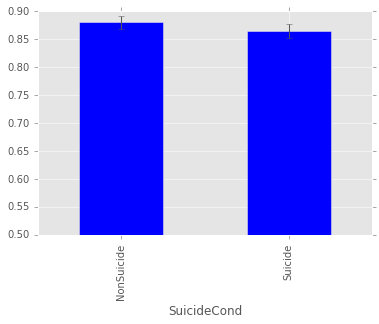

In [69]:
sem1 = d[(d.ConditionCue_Corr_Resp=='Resp')&(d.Condition=='NegRef')&(d.Group==2)].groupby(['SuicideCond']).Correct_Choice_raw.sem()['NonSuicide']
sem2 = d[(d.ConditionCue_Corr_Resp=='Resp')&(d.Condition=='NegRef')&(d.Group==2)].groupby(['SuicideCond']).Correct_Choice_raw.sem()['Suicide']
d[(d.ConditionCue_Corr_Resp=='Resp')&(d.Condition=='NegRef')&(d.Group==2)].groupby(['SuicideCond']).Correct_Choice_raw.mean().plot(kind='bar',  yerr=[sem1,sem2])
plt.ylim([.5,.9])   
sem1, sem2

(0.01374389527387109, 0.013286019155270157)

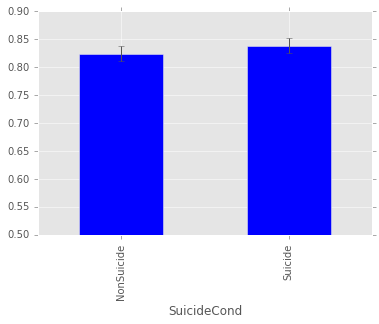

In [70]:
sem1 = d[(d.ConditionCue_Corr_Resp=='NoResp')&(d.Condition=='NegRef')&(d.Group==2)].groupby(['SuicideCond']).Correct_Choice_raw.sem()['NonSuicide']
sem2 = d[(d.ConditionCue_Corr_Resp=='NoResp')&(d.Condition=='NegRef')&(d.Group==2)].groupby(['SuicideCond']).Correct_Choice_raw.sem()['Suicide']
d[(d.ConditionCue_Corr_Resp=='NoResp')&(d.Condition=='NegRef')&(d.Group==2)].groupby(['SuicideCond']).Correct_Choice_raw.mean().plot(kind='bar',  yerr=[sem1,sem2])
plt.ylim([.5,.9])   
sem1, sem2

(0.7, 0.9)

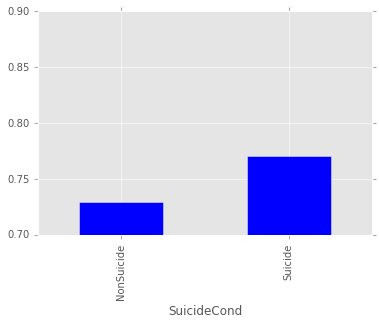

In [39]:
d[(d.ConditionCue_Corr_Resp=='NoResp')&(d.Condition=='NegRef')&(d.Group==1)].groupby(['SuicideCond']).Correct_Choice_raw.mean().plot(kind='bar')
plt.ylim([.7,.9])
# plt.show()

(0.7, 0.9)

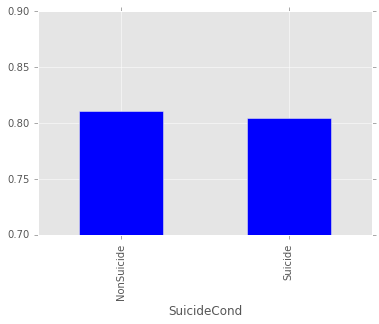

In [108]:
d[(d.ConditionCue_Corr_Resp=='Resp')&(d.Condition=='NegRef')&(d.Group==1)].groupby(['SuicideCond']).Correct_Choice_raw.mean().plot(kind='bar')
plt.ylim([.7,.9])
# plt.show()

(0.7, 0.9)

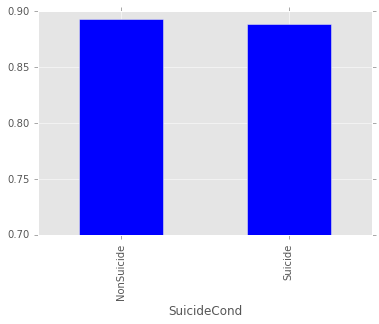

In [109]:
d[(d.ConditionCue_Corr_Resp=='Resp')&(d.Condition=='NegRef')&(d.Group==2)].groupby(['SuicideCond']).Correct_Choice_raw.mean().plot(kind='bar')
plt.ylim([.7,.9])
# plt.show()

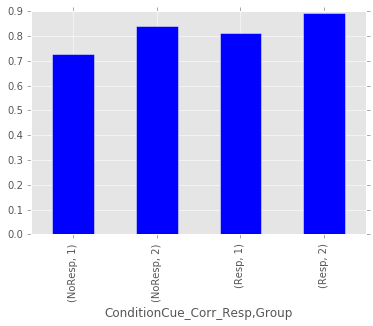

In [91]:
d[(d.SuicideCond=='NonSuicide')&(d.Condition=='NegRef')].groupby(['ConditionCue_Corr_Resp','Group']).Correct_Choice_raw.mean().plot(kind='bar')

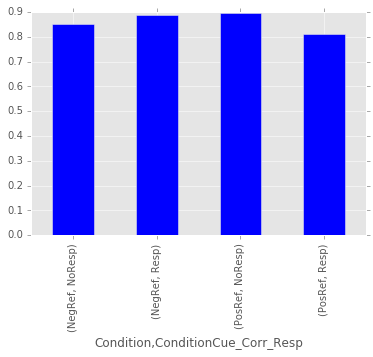

In [74]:
d[(d.SuicideCond=='Suicide')&(d.Group==2)].groupby(['Condition','ConditionCue_Corr_Resp']).Correct_Choice_raw.mean().plot(kind='bar')

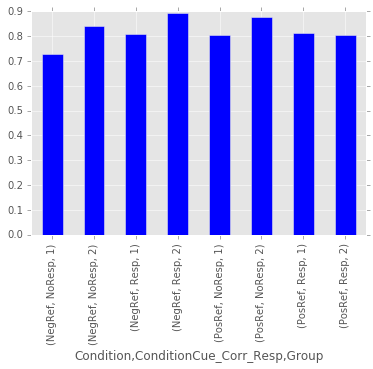

In [75]:
d[(d.SuicideCond=='NonSuicide')].groupby(['Condition','ConditionCue_Corr_Resp','Group']).Correct_Choice_raw.mean().plot(kind='bar')

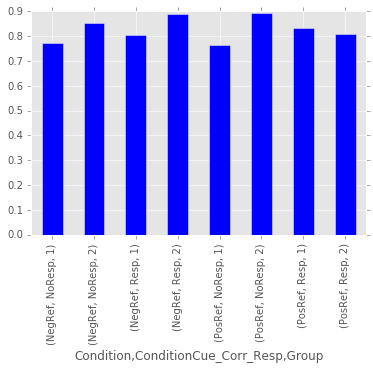

In [76]:
d[(d.SuicideCond=='Suicide')].groupby(['Condition','ConditionCue_Corr_Resp','Group']).Correct_Choice_raw.mean().plot(kind='bar')

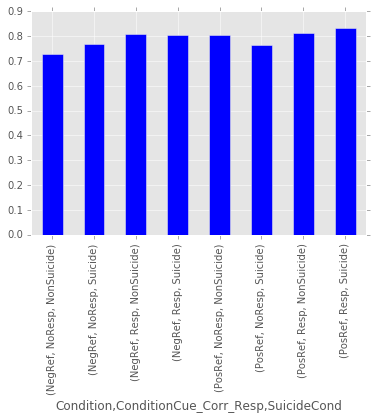

In [81]:
d[(d.Group==1)].groupby(['Condition','ConditionCue_Corr_Resp','SuicideCond']).Correct_Choice_raw.mean().plot(kind='bar')

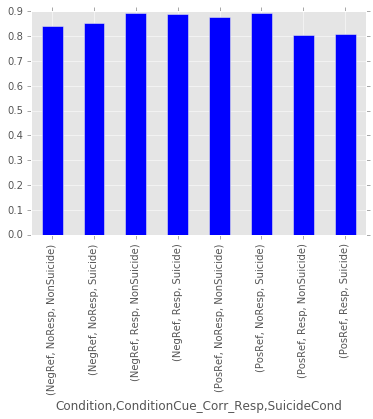

In [78]:
d[(d.Group==2)].groupby(['Condition','ConditionCue_Corr_Resp','SuicideCond']).Correct_Choice_raw.mean().plot(kind='bar')

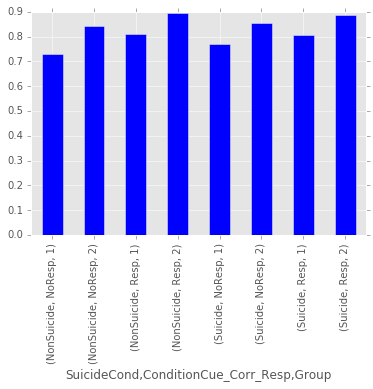

In [85]:
d[(d.Condition=='NegRef')].groupby(['SuicideCond','ConditionCue_Corr_Resp','Group']).Correct_Choice_raw.mean().plot(kind='bar')